In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [69]:
a, b = 0, 3
def f(x: np.float64) -> np.float64:
    return 6*np.exp(-x) * np.sin(2*np.pi*x)
true_value, err = quad(f, a, b)
print(true_value, err)

0.8849699594107223 1.3479948794879062e-12


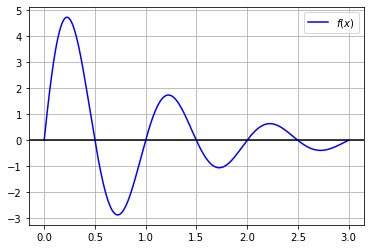

In [92]:
x_data = np.linspace(a, b, 1000)
fig, axs = plt.subplots()
axs.plot(x_data, f(x_data), label="$f(x)$", color="blue")
ax = plt.gca()
ax.axhline(y=0, color='k')
axs.legend()
axs.grid(True)

In [93]:
def IntegrateByStep(f, h, a=a, b=b) -> float:
    n_steps = int(np.floor((b - a)/h))
    x = lambda i: a + i*h
    elem = lambda i: f(x(i-1)) + 3*f(x(i-1) + h/3) + 3*f(x(i) - h/3) + f(x(i))
    return h/8 * sum([elem(i) for i in range(1, n_steps+1)])

def IntegrateByPrecision(f, eps, a=a, b=b) -> float:
    h = (b - a)/8
    I_2h, I_h = IntegrateByStep(f, 2*h), IntegrateByStep(f, h)
    while np.abs((I_h - I_2h)/15) > eps:
        h /= 2
        I_2h, I_h = I_h, IntegrateByStep(f, h)
    return I_2h, I_h, h #double-step value, exact value, step length

In [95]:
I_2h, I_h, h = IntegrateByPrecision(f, 1e-12)
n_steps = int((b - a) / h)
R_2h = np.abs(I_2h - true_value)
R_h = np.abs(I_h - true_value)

I_Runge = I_h + (I_h - I_2h)/15
R_Runge = np.abs(I_Runge - true_value)
print("True value: ", true_value, "| err: ", err)
print("I_2h      : ", I_2h, "| err: ", R_2h, "| h: ", h)
print("I_h       : ", I_h, "| err: ", R_h, "| h: ", h/2)
print("I_Runge   : ", I_Runge, "| err: ", R_Runge)
print("N steps   : ", n_steps)

True value:  0.8849699594107223 | err:  1.3479948794879062e-12
I_2h      :  0.8849699594255764 | err:  1.485411793566982e-11 | h:  0.00146484375
I_h       :  0.8849699594116519 | err:  9.295897385186436e-13 | h:  0.000732421875
I_Runge   :  0.8849699594107236 | err:  1.3322676295501878e-15
N steps   :  2048
